In [1]:
# Cell 1: Imports and Data Preparation
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Load Iris dataset and select two features: sepal length (0), petal length (2)
iris = load_iris()
X = iris.data[:, [0, 2]]
y = iris.target

# Binarize labels: setosa (class 0) → 0, others → 1
y = np.where(y == 0, 0, 1)


In [2]:
# Cell 2: Define Perceptron and Train
# Initialize weights and bias
w = np.zeros(2)
b = 0.0

# Learning rate and number of epochs
lr = 0.1
epochs = 50

# Perceptron prediction function
def perceptron_predict(xi, w, b):
    return 1 if (np.dot(xi, w) + b) >= 0 else 0

# Training loop
for epoch in range(epochs):
    for xi, target in zip(X, y):
        pred = perceptron_predict(xi, w, b)
        error = target - pred
        # Update weights and bias
        w += lr * error * xi
        b += lr * error


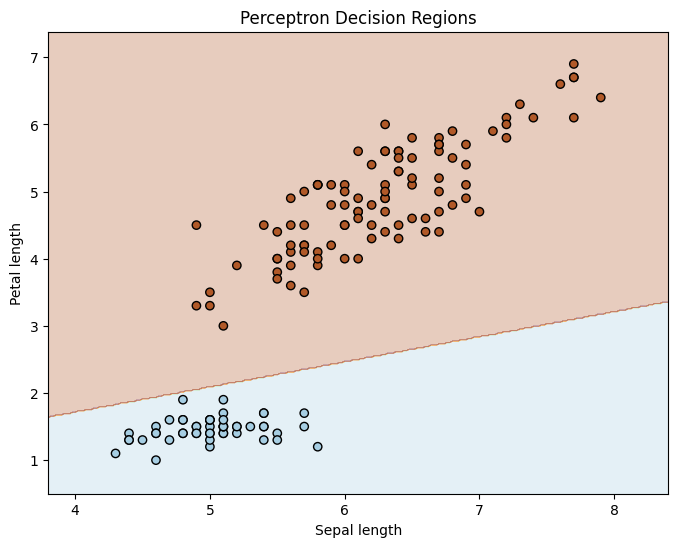

In [3]:
# Cell 3: Plot Decision Regions
# Create mesh grid over feature space
x_min, x_max = X[:,0].min() - 0.5, X[:,0].max() + 0.5
y_min, y_max = X[:,1].min() - 0.5, X[:,1].max() + 0.5
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, 0.02),
    np.arange(y_min, y_max, 0.02)
)

# Predict on grid
grid_points = np.c_[xx.ravel(), yy.ravel()]
Z = np.array([perceptron_predict(pt, w, b) for pt in grid_points])
Z = Z.reshape(xx.shape)

# Plot
plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)
plt.scatter(X[:,0], X[:,1], c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Petal length')
plt.title('Perceptron Decision Regions')
plt.show()
